In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import pingouin as pg
import scipy
from scipy.stats import chi2
from scipy.stats import chi2_contingency
from scipy.stats import pearsonr, spearmanr
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import tree
from sklearn.tree import export_graphviz
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_curve,  precision_recall_curve, roc_auc_score, confusion_matrix, accuracy_score, recall_score, precision_score, f1_score,auc, roc_curve, plot_confusion_matrix
from category_encoders import BinaryEncoder
from IPython.display import Image
import pydotplus
import matplotlib.pyplot as plt
%matplotlib inline
color = sns.color_palette()
seed = 42
import dataframe_image as dfi

# Proje Konusu

Günümüzde bankaların hangi müşteriye kredi verilip verilmeyeceğine gerektiğine karar vermesi önemli bir konudur. Bu projede, bu konuyla ilgili en iyi tahmin yapan bir model  geliştirilecek. 

 - Data Analysis
 - Data Wragling
 - Model

In [8]:
data = pd.read_csv('lending_club_loan_dataset.csv', low_memory=False)

In [9]:
data.head()

,id,grade,annual_inc,short_emp,emp_length_num,home_ownership,dti,purpose,term,last_delinq_none,last_major_derog_none,revol_util,total_rec_late_fee,od_ratio,bad_loan
0,11454641,A,100000.0,1,1,RENT,26.27,credit_card,36 months,1,NaN,43.2,0.0,0.160624,0
1,9604874,A,83000.0,0,4,OWN,5.39,credit_card,36 months,0,NaN,21.5,0.0,0.810777,0
2,9684700,D,78000.0,0,11,MORTGAGE,18.45,debt_consolidation,60 months,1,NaN,46.3,0.0,0.035147,1
3,9695736,D,37536.0,0,6,MORTGAGE,12.28,medical,60 months,0,NaN,10.7,0.0,0.534887,1
4,9795013,D,65000.0,0,11,MORTGAGE,11.26,debt_consolidation,36 months,0,NaN,15.2,0.0,0.166500,0


In [10]:
dfi.export(data.head(), 'veriseti3_head.png')

|Column| | Describe | |Type|
|---| |---| |---|
|id | | Unique ID of the loan application. |	|int|
|grade | | LC assigned loan grade |	|Char|
|annual_inc | | The self-reported annual income provided by the borrower during registration. | |double |
|short_emp | | 1 when employed for 1 year or less. | |int|
|emp_length_num | | Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. | |int|
|home_ownership	| | Type of home ownership. |string|
|dti( Debt-To-Income Ratio) | | A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income | |percentenge|
|purpose | | A category provided by the borrower for the loan request. | |integer|
|term | | The number of payments on the loan. Values are in months and can be either 36 or 60. | |string |
|last_delinq_none| | 1 when the borrower had at least one event of delinquency.| |int|
|last_major_derog_none| | 1 borrower had at least 90 days of a bad rating.| |int|
|revol_util| | Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.| | double|
|total_rec_late_fee| | Late fees received to date| |int|
|od_ratio| | Overdraft ratio| |int|
|bad_loan| | 1 when a loan was not paid.| |int|


### 1) DATA ANALYSIS

In [4]:
data.describe().round(3)

,id,annual_inc,short_emp,emp_length_num,dti,last_delinq_none,last_major_derog_none,revol_util,total_rec_late_fee,od_ratio,bad_loan
count,2.000000e+04,20000.000,20000.000,20000.000,19846.000,20000.000,574.000,20000.000,20000.000,20000.000,20000.0
mean,7.590662e+06,73349.578,0.112,6.821,16.588,0.547,0.760,55.958,0.291,0.504,0.2
std,1.609593e+06,45198.567,0.316,3.774,7.586,0.498,0.428,42.117,3.109,0.288,0.4
min,5.860400e+05,8412.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0
25%,6.206283e+06,47000.000,0.000,3.000,10.852,0.000,1.000,38.800,0.000,0.257,0.0
50%,7.378896e+06,65000.000,0.000,7.000,16.190,1.000,1.000,57.100,0.000,0.507,0.0
75%,8.766235e+06,88000.000,0.000,11.000,22.060,1.000,1.000,73.900,0.000,0.754,0.0
max,1.145464e+07,1000000.000,1.000,11.000,34.990,1.000,1.000,5010.000,96.467,1.000,1.0


The dataset has 20000 observations and 15 variables including the target, divided into 11 numeric and 4 categoric features.

In [5]:
data.describe(include=[np.object])

<ipython-input-5-c07674af406a>:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data.describe(include=[np.object])


,grade,home_ownership,purpose,term
count,20000,18509,20000,20000
unique,7,3,12,3
top,B,MORTGAGE,debt_consolidation,36 months
freq,6042,9844,12337,14969


In [6]:
loan = data.bad_loan.value_counts().to_frame().rename(columns={"bad_loan":"absolute" })

loan["percent"] = loan.apply(lambda x: x/x.sum()*100).round(2)

loan

,absolute,percent
0,16000,80.0
1,4000,20.0


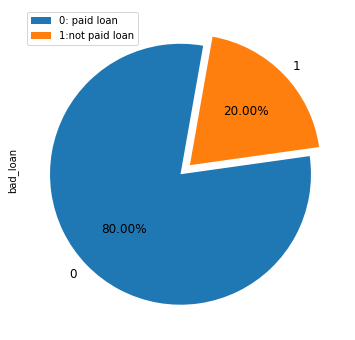

In [7]:
#pie chart
data.bad_loan.value_counts().plot(kind = 'pie', subplots=True,
                                 autopct='%1.2f%%', explode = (0.05, 0.05),
                                  startangle=80, legend =True,
                                  fontsize=12, figsize=(14,6), textprops={'color':"black"})
plt.legend(["0: paid loan","1:not paid loan"]);

In [8]:
data.dtypes.sort_values(ascending=True)

id                         int64
short_emp                  int64
emp_length_num             int64
last_delinq_none           int64
bad_loan                   int64
annual_inc               float64
dti                      float64
last_major_derog_none    float64
revol_util               float64
total_rec_late_fee       float64
od_ratio                 float64
grade                     object
home_ownership            object
purpose                   object
term                      object
dtype: object

In [9]:
data.dtypes.value_counts()

float64    6
int64      5
object     4
dtype: int64

### Missing Values

In [10]:
nulval = data.isnull().sum().to_frame().rename(columns ={ 0: "absolute"})

nulval["percent"] = (nulval.apply(lambda x: x/x.sum())*100).round(2)

nulval

,absolute,percent
id,0,0.00
grade,0,0.00
annual_inc,0,0.00
short_emp,0,0.00
emp_length_num,0,0.00
home_ownership,1491,7.08
dti,154,0.73
purpose,0,0.00
term,0,0.00
last_delinq_none,0,0.00


In [11]:
# Histogram
def hist(x):
    plt.hist(data[x], bins=25)
    plt.title(x, fontsize=10, loc="right")
    plt.xlabel('Relative frequency')
    plt.ylabel('Absolute frequency')
    plt.show()

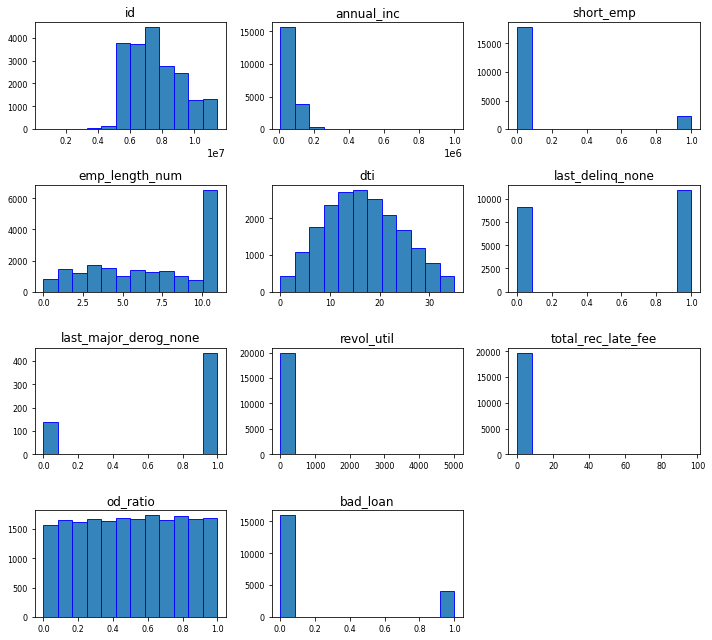

In [12]:
data.hist(figsize=(10,9), bins=12, ec="b", xlabelsize=8, ylabelsize=8, alpha=0.9, grid=False)

plt.tight_layout()
plt.show()

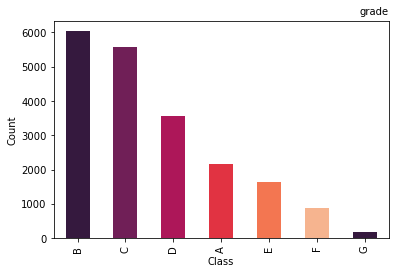

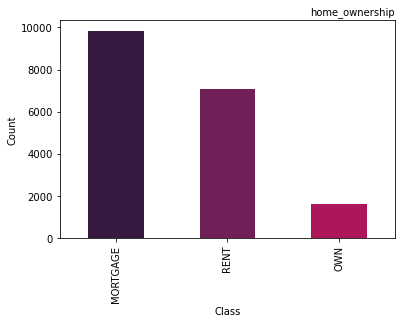

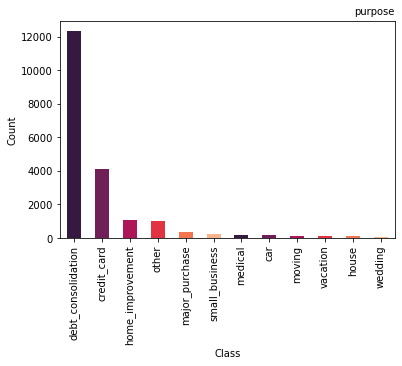

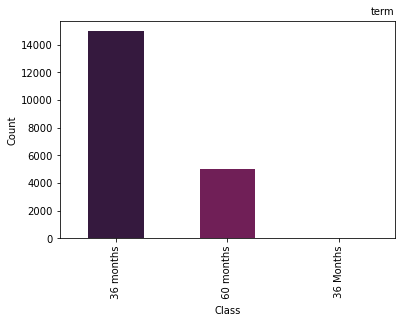

In [13]:
for col in data.select_dtypes(include=["object"]).columns:
    data[col].value_counts().plot(kind="bar", color=sns.color_palette("rocket"))

    plt.xlabel("Class", fontsize=10)
    plt.xticks(rotation = 90, horizontalalignment ="center")
    plt.ylabel("Count", fontsize =10)
    plt.title(col, fontsize=10, loc = "right")
    plt.show()

There is a problem with "term" name. I will fix with lowering its name's characters.

In [14]:
data.term = data.term.str.lower()
data.term.value_counts()

 36 months    15001
 60 months     4999
Name: term, dtype: int64

#### A) Feature : Grade

In [15]:
def target(x):
    short_0 = data[data.bad_loan == 0].loc[:,x]
    short_1 = data[data.bad_loan == 1].loc[:,x]
    
    a = np.array(short_0)
    b = np.array(short_1)
    
    np.warnings.filterwarnings('ignore')
    
    plt.hist(a, bins=40, density=True, color="g", alpha = 0.6, label='Not-default', align="left")
    plt.hist(b, bins=40, density=True, color="r", alpha = 0.6, label='Default', align="right")
    plt.legend(loc='upper right')
    plt.title(x, fontsize=10, loc="right")
    plt.xlabel('Absolute frequency')
    plt.ylabel('Relative frequency')
    plt.show()

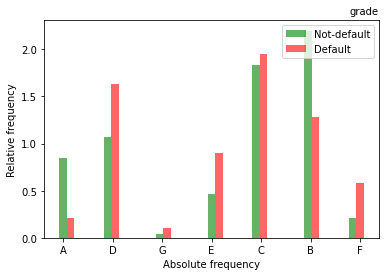

In [16]:
target("grade")

#### B) Feature : annual_inc

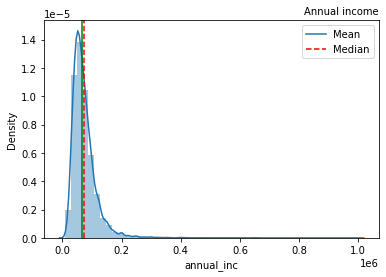

'Median: 65000.0'

'Mean: 73349.57835'

In [17]:
variable = data["annual_inc"]

mean =np.array(variable).mean()
median = np.median(variable)

ax= sns.distplot(variable)
ax.axvline(mean,color='r', linestyle = '--')
ax.axvline(median,color='g', linestyle = '-')

plt.title("Annual income", fontsize=10, loc="right")
plt.legend({'Mean': mean, 'Median': median})
plt.show()

display("Median: " + str(median))
display("Mean: " + str(mean))

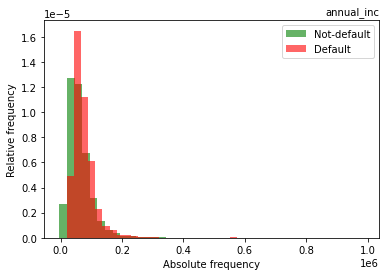

In [18]:
target("annual_inc")

#### C) Feature : short_emp

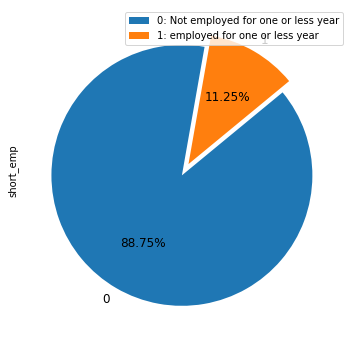

In [19]:
data.short_emp.value_counts().plot(kind = 'pie', subplots=True,
                                 autopct='%1.2f%%', explode = (0.05, 0.05),
                                  startangle=80, legend =True,
                                  fontsize=12, figsize=(14,6), textprops={'color':"black"})
plt.legend(["0: Not employed for one or less year","1: employed for one or less year"]);

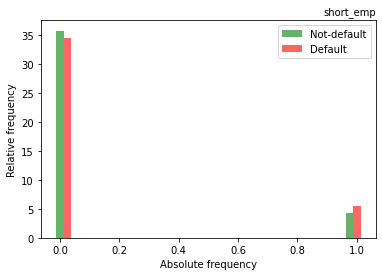

In [20]:
target("short_emp")

#### D) Feature: emp_length_num

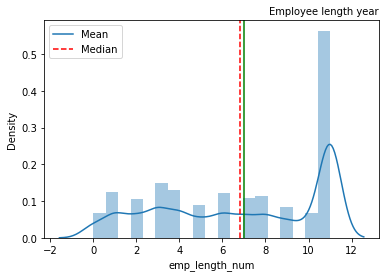

'Median: 7.0'

'Mean: 6.8214'

In [21]:
variable = data["emp_length_num"]
mean =np.array(variable).mean()
median = np.median(variable)

ax= sns.distplot(variable)
ax.axvline(mean,color='r', linestyle = '--')
ax.axvline(median,color='g', linestyle = '-')

plt.title("Employee length year", fontsize=10, loc="right")
plt.legend({'Mean': mean, 'Median': median})
plt.show()

display("Median: " + str(median))
display("Mean: " + str(mean))

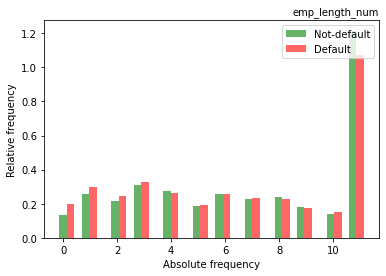

In [22]:
target("emp_length_num")

#### E) Feature : home_ownership

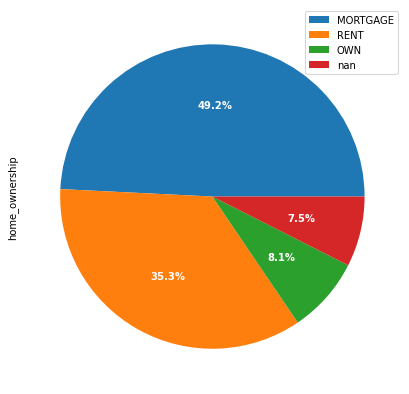

In [23]:
data["home_ownership"].value_counts(dropna=False).plot(kind='pie', 
                                                       figsize=(7,7), 
                                                       fontsize=10, autopct='%1.1f%%', 
                                                       startangle=0, legend=True, 
                                                       textprops={'color':"white", 'weight':'bold'});

#### E) Feature : dti ( Debt to income) 

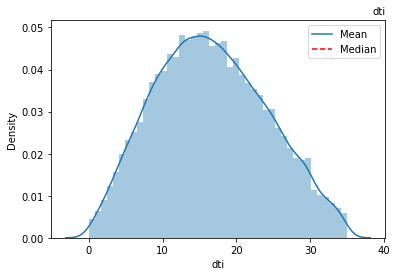

In [24]:
variable = data["dti"]
mean =np.array(variable).mean()
median = np.median(variable)

ax= sns.distplot(variable)
ax.axvline(mean,color='r', linestyle = '--')
ax.axvline(median,color='g', linestyle = '-')

plt.title("dti", fontsize=10, loc="right")
plt.legend({'Mean': mean, 'Median': median})
plt.show()


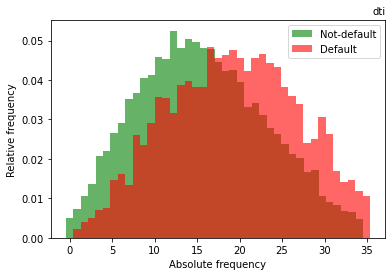

In [25]:
target("dti")

#### F) Feature: Purpose

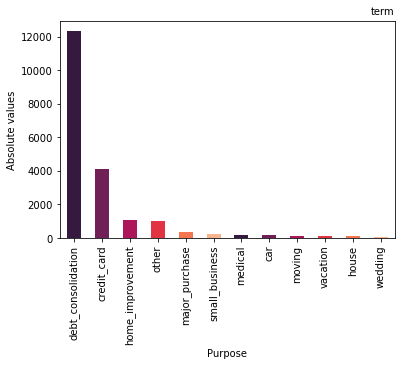

In [26]:
data["purpose"].value_counts().plot(kind="bar", color=sns.color_palette("rocket"))

plt.xlabel("Purpose", fontsize=10)
plt.xticks(rotation = 90, horizontalalignment ="center")
plt.ylabel("Absolute values", fontsize =10)
plt.title(col, fontsize=10, loc = "right")
plt.show()

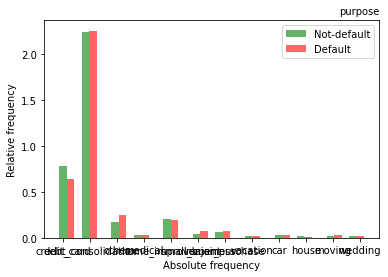

In [27]:
target("purpose")

#### G) Feature : term

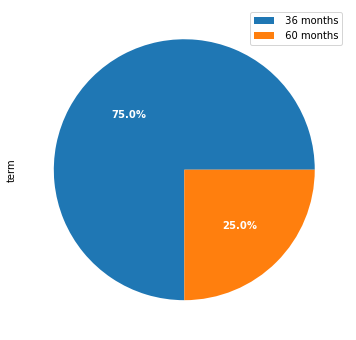

In [28]:
data["term"].value_counts(dropna=False).plot(kind='pie', 
                                                       figsize=(6,6), 
                                                       fontsize=10, autopct='%1.1f%%', 
                                                       startangle=0, legend=True, 
                                                       textprops={'color':"white", 'weight':'bold'});

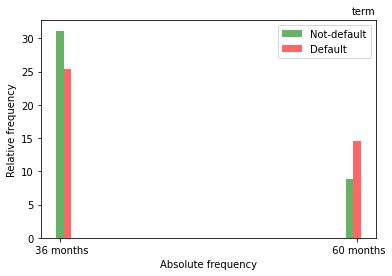

In [29]:
target("term")

#### H) Feature: last_delinq_none

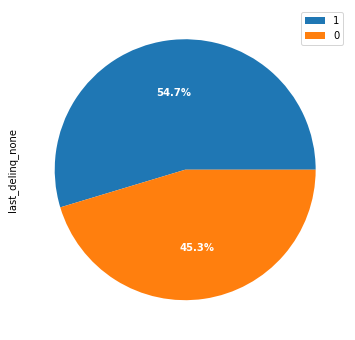

In [30]:
data["last_delinq_none"].value_counts(dropna=False).plot(kind='pie', 
                                                       figsize=(6,6), 
                                                       fontsize=10, autopct='%1.1f%%', 
                                                       startangle=0, legend=True, 
                                                       textprops={'color':"white", 'weight':'bold'});

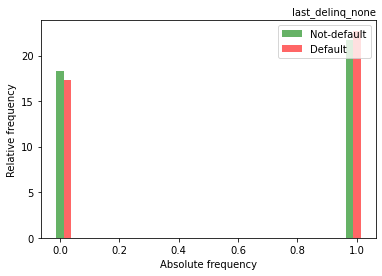

In [31]:
target("last_delinq_none")

#### I) Feature: last_major_derog_none

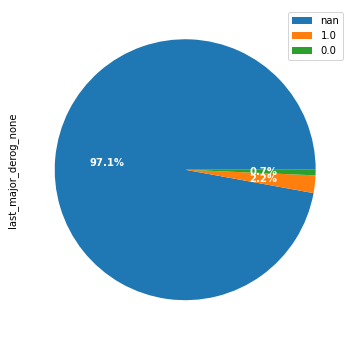

In [32]:
data["last_major_derog_none"].value_counts(dropna=False).plot(kind='pie', 
                                                       figsize=(6,6), 
                                                       fontsize=10, autopct='%1.1f%%', 
                                                       startangle=0, legend=True, 
                                                       textprops={'color':"white", 'weight':'bold'});

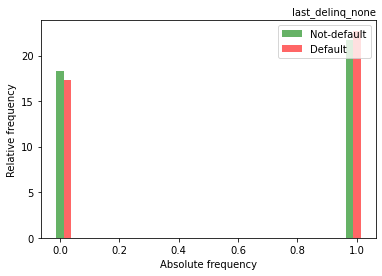

In [33]:
target("last_delinq_none")

#### J) Feature: revol util

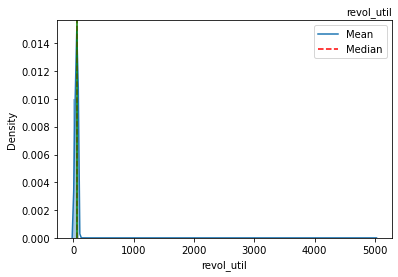

'Median: 57.1'

'Mean: 55.958148054999995'

In [34]:
variable = data["revol_util"]
mean =np.array(variable).mean()
median = np.median(variable)

ax= sns.distplot(variable)
ax.axvline(mean,color='r', linestyle = '--')
ax.axvline(median,color='g', linestyle = '-')

plt.title("revol_util", fontsize=10, loc="right")
plt.legend({'Mean': mean, 'Median': median})
plt.show()

display("Median: " + str(median))
display("Mean: " + str(mean))

#### K) Feature: total_rec_late_fee

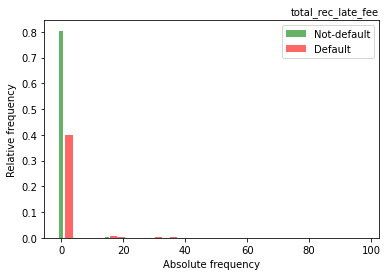

In [35]:
target("total_rec_late_fee")

### Correlation

#### Pearson

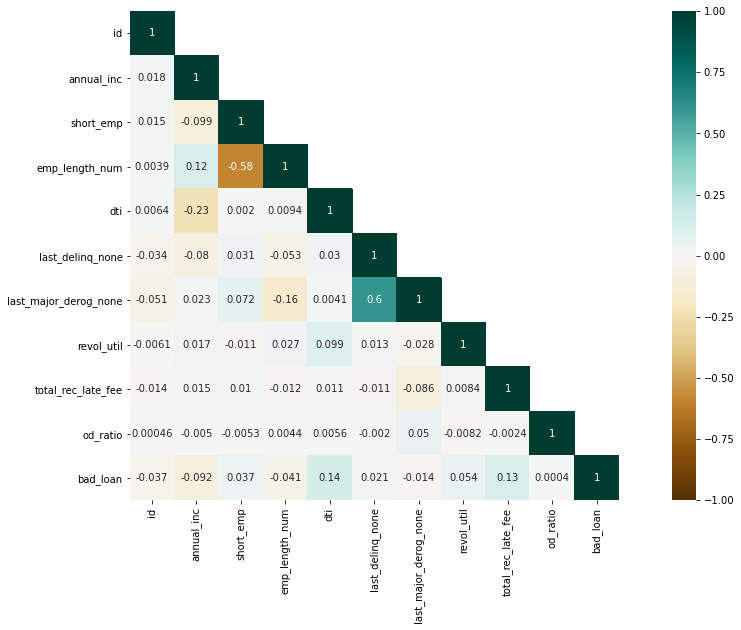

In [36]:
mask = np.triu(data.corr(), 1)

plt.figure(figsize=(19, 9))

sns.heatmap(data.corr(), annot=True, vmax=1, vmin=-1, square=True, cmap='BrBG', mask=mask);

The variable that is most correlated with the target is ‘dti’ with a weak and positive correlation of 0.141884.

## 2) Data Wragling ( Cleaning, Missing values, Encoding) 

In [37]:
# Numerical data
data_ca = data.select_dtypes(exclude=["int64","float64"]).copy()

In [38]:
# Categoric data
data_nu = data.select_dtypes(exclude=["object","category"]).copy()

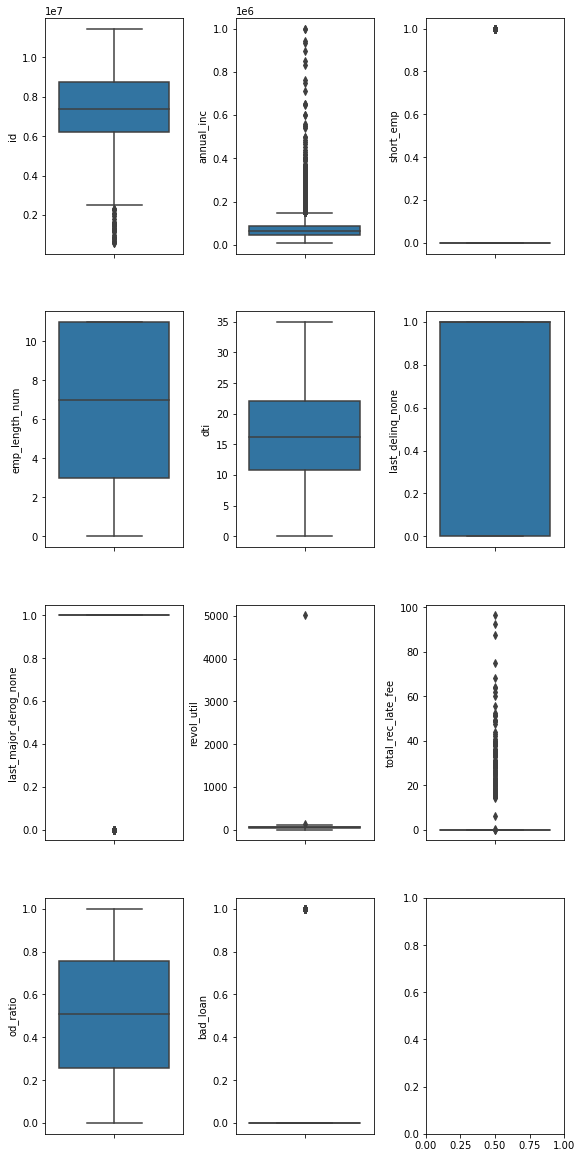

In [39]:
fig , axs = plt.subplots(ncols = 3, nrows=4, figsize=(8,16))
index = 0
axs = axs.flatten()

for k,v in data_nu.items():
    sns.boxplot(y = k , data = data_nu, ax = axs[index], orient = "h")
    index +=1
    plt.tight_layout(pad= 0.4, w_pad = 0.5 , h_pad = 5.0)

### annual_inc

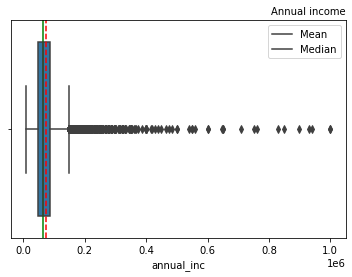

count      20000.000000
mean       73349.578350
std        45198.567255
min         8412.000000
25%        47000.000000
50%        65000.000000
75%        88000.000000
max      1000000.000000
Name: annual_inc, dtype: float64


In [40]:
variable = data["annual_inc"]

mean =np.array(variable).mean()
median = np.median(variable)

ax= sns.boxplot(variable)
ax.axvline(mean,color='r', linestyle = '--')
ax.axvline(median,color='g', linestyle = '-')

plt.title("Annual income", fontsize=10, loc="right")
plt.legend({'Mean': mean, 'Median': median})
plt.show()

print(data.annual_inc.describe())

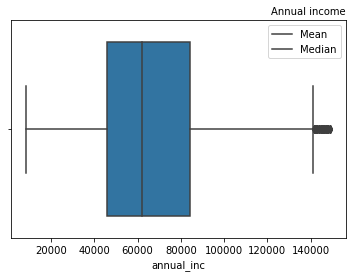

count     19074.000000
mean      66792.117857
std       27241.646991
min        8412.000000
25%       46000.000000
50%       62000.000000
75%       84000.000000
max      149000.000000
Name: annual_inc, dtype: float64


In [41]:
# finding outliners according to IQR score and DELETING

Q1 = data['annual_inc'].quantile(0.25)
Q3 = data['annual_inc'].quantile(0.75)

IQR = Q3 -Q1

data['annual_inc'] = data.annual_inc[~((data.annual_inc < Q1 - 1.5 * IQR ) |
                                      (data.annual_inc > Q3 + 1.5 *IQR ))]




variable = data["annual_inc"]

mean =np.array(variable).mean()
median = np.median(variable)

ax= sns.boxplot(variable)
ax.axvline(mean,color='r', linestyle = '--')
ax.axvline(median,color='g', linestyle = '-')

plt.title("Annual income", fontsize=10, loc="right")
plt.legend({'Mean': mean, 'Median': median})
plt.show()

print(data.annual_inc.describe())

In [42]:
 print( "Number of deleted outliners : "+ str(data_nu.annual_inc.describe()[0] - data.annual_inc.describe()[0]))

Number of deleted outliners : 926.0


### revol_util

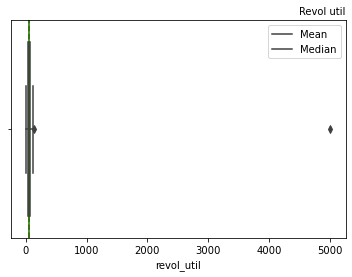

count    20000.000000
mean        55.958148
std         42.117456
min          0.000000
25%         38.800000
50%         57.100000
75%         73.900000
max       5010.000000
Name: revol_util, dtype: float64


In [43]:
variable = data["revol_util"]

mean =np.array(variable).mean()
median = np.median(variable)

ax= sns.boxplot(variable)
ax.axvline(mean,color='r', linestyle = '--')
ax.axvline(median,color='g', linestyle = '-')

plt.title("Revol util", fontsize=10, loc="right")
plt.legend({'Mean': mean, 'Median': median})
plt.show()

print(data.revol_util.describe())

In [44]:
# deleting outliner

value = data.revol_util.quantile([.9999])
p = value.iloc[0]
print("Threshold value value : " + str(p))

data = data[data["revol_util"] < p]

Threshold value value : 112.90151999996161


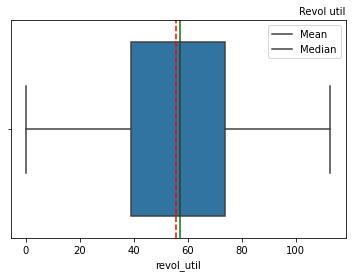

count    19998.000000
mean        55.706814
std         23.375702
min          0.000000
25%         38.800000
50%         57.100000
75%         73.900000
max        112.900000
Name: revol_util, dtype: float64


In [45]:
variable = data["revol_util"]

mean =np.array(variable).mean()
median = np.median(variable)

ax= sns.boxplot(variable)
ax.axvline(mean,color='r', linestyle = '--')
ax.axvline(median,color='g', linestyle = '-')

plt.title("Revol util", fontsize=10, loc="right")
plt.legend({'Mean': mean, 'Median': median})
plt.show()

print(data.revol_util.describe())

### total_rec_late_fee

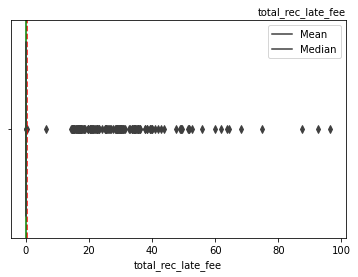

count    19998.000000
mean         0.289901
std          3.107068
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         96.466600
Name: total_rec_late_fee, dtype: float64


In [46]:
variable = data["total_rec_late_fee"]

mean =np.array(variable).mean()
median = np.median(variable)

ax= sns.boxplot(variable)
ax.axvline(mean,color='r', linestyle = '--')
ax.axvline(median,color='g', linestyle = '-')

plt.title("total_rec_late_fee", fontsize=10, loc="right")
plt.legend({'Mean': mean, 'Median': median})
plt.show()

print(data.total_rec_late_fee.describe())

In [47]:
value = data.total_rec_late_fee.quantile([.990])
p = value.iloc[0]

print("Threshold value value : " + str(p))

data = data[data["total_rec_late_fee"] < p]

Threshold value value : 15.0


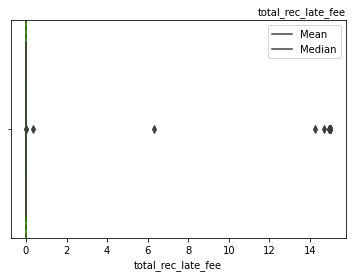

count    19796.000000
mean         0.018447
std          0.521768
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         14.997400
Name: total_rec_late_fee, dtype: float64


In [48]:
variable = data["total_rec_late_fee"]

mean =np.array(variable).mean()
median = np.median(variable)

ax= sns.boxplot(variable)
ax.axvline(mean,color='r', linestyle = '--')
ax.axvline(median,color='g', linestyle = '-')

plt.title("total_rec_late_fee", fontsize=10, loc="right")
plt.legend({'Mean': mean, 'Median': median})
plt.show()

print(data.total_rec_late_fee.describe())

### MISSING VALUES 

In [49]:
for column in data.columns:
    if data[column].isna().sum() != 0:
        missing = data[column].isna().sum()
        portion = (missing / data.shape[0]) * 100
        print(f"'{column}': number of missing values : '{missing}', portion : '{portion:.3f}%'")

'annual_inc': number of missing values : '915', portion : '4.622%'
'home_ownership': number of missing values : '1477', portion : '7.461%'
'dti': number of missing values : '152', portion : '0.768%'
'last_major_derog_none': number of missing values : '19225', portion : '97.116%'


#### annual_inc (Method: Replacing missing values with mean ( avarage ) )

In [50]:

data["annual_inc"] = data. annual_inc.fillna(data.annual_inc.mean())

print(data.annual_inc.isnull().values.any())

False


#### home_ownership (Method: Replacing missing values with most frequently value)

In [51]:
data["home_ownership"] = data.home_ownership.fillna(data.home_ownership.value_counts().index[0])

print(data.home_ownership.isnull().values.any())

False


Text(1.0, 1.0, 'home_ownership')

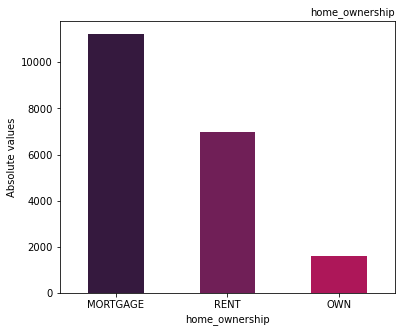

In [52]:
data["home_ownership"].value_counts(dropna=False).plot(kind="bar", figsize=(6,5), 
                                                       fontsize=10, 
                                                       color=sns.color_palette("rocket"), 
                                                       table=False)
plt.xlabel("home_ownership", fontsize=10)
plt.xticks(rotation=0, horizontalalignment="center")
plt.ylabel("Absolute values", fontsize=10)
plt.title("home_ownership", fontsize=10, loc="right")

#### dti  (Method: Replacing missing values with mean (avarage))

In [53]:

data["dti"] = data.dti.fillna(data.dti.mean())

print(data.dti.isnull().values.any())

False


#### last_major_derog_none (Method: Drop column because of too many NA)

In [54]:
data.drop("last_major_derog_none", axis=1, inplace=True)

### Data selection

#### 'id' (Irrelevand feature)

In [55]:
data.drop("id", axis =1, inplace = True)

data.shape

(19796, 13)

In [56]:
data_nu = data.select_dtypes(exclude=["object","category"]).copy()

Xnumerical = data_nu.drop(["bad_loan"], axis ="columns")
Ynumerical = data_nu.bad_loan

In [57]:
pd.DataFrame(
    [scipy.stats.pearsonr(Xnumerical[col],
    Ynumerical) for col in Xnumerical.columns],
    columns= ["Pearson Corr.", "p-value"],
    index = Xnumerical.columns,
).round(4)

,Pearson Corr.,p-value
annual_inc,-0.1234,0.0000
short_emp,0.0366,0.0000
emp_length_num,-0.0406,0.0000
dti,0.1397,0.0000
last_delinq_none,0.0216,0.0024
revol_util,0.1008,0.0000
total_rec_late_fee,0.0484,0.0000
od_ratio,0.0007,0.9236


##### From heat map, lowest pearson value 0.0004 'od_ratio'. So decided to drop this column.

In [58]:
data.drop("od_ratio", axis =1, inplace = True)

data.shape

(19796, 12)

In [59]:
Xcategorical = data.select_dtypes(exclude = ['int64', 'float64']).copy()

In [60]:
Ycategorical = data.bad_loan

In [61]:
for col in Xcategorical.columns:
    table = pd.crosstab(Xcategorical[col], Ycategorical)
    print()
    display(table)
    _, pval, _, expected_table = scipy.stats.chi2_contingency(table)
    print(f"p-value: {pval:.25f}")

bad_loan,0,1
grade,,
A,2031,120
B,5259,737
C,4376,1128
D,2566,955
E,1099,517
F,509,335
G,102,62


p-value: 0.0000000000000000000000000



bad_loan,0,1
home_ownership,,
MORTGAGE,9300,1927
OWN,1293,308
RENT,5349,1619


p-value: 0.0000000000000000000001098



bad_loan,0,1
purpose,,
car,138,30
credit_card,3425,681
debt_consolidation,9826,2388
home_improvement,881,199
house,85,13
major_purchase,290,83
medical,135,38
moving,92,29
other,745,266


p-value: 0.0000000000000261163123969



bad_loan,0,1
term,,
36 months,12420,2447
60 months,3522,1407


p-value: 0.0000000000000000000000000


In [62]:
data.head()

,grade,annual_inc,short_emp,emp_length_num,home_ownership,dti,purpose,term,last_delinq_none,revol_util,total_rec_late_fee,bad_loan
0,A,100000.0,1,1,RENT,26.27,credit_card,36 months,1,43.2,0.0,0
1,A,83000.0,0,4,OWN,5.39,credit_card,36 months,0,21.5,0.0,0
2,D,78000.0,0,11,MORTGAGE,18.45,debt_consolidation,60 months,1,46.3,0.0,1
3,D,37536.0,0,6,MORTGAGE,12.28,medical,60 months,0,10.7,0.0,1
4,D,65000.0,0,11,MORTGAGE,11.26,debt_consolidation,36 months,0,15.2,0.0,0


### ENCODING 

#### ' grade '


In [63]:
data["grade"] = data.grade.map({"A":7, "B":6, "C":5, "D":4, "E":3, "F":2, "G":1})

#### ' term ' , ' home_ownership' , ' purpose '

In [64]:
df_term = data.term
df_home = data.home_ownership
df_purp = data.purpose

# term
t_ohe = pd.get_dummies(df_term)
bin_enc_term = BinaryEncoder()
t_bin = bin_enc_term.fit_transform(df_term)

h_ohe = pd.get_dummies(df_home)
bin_enc_home = BinaryEncoder()
h_bin = bin_enc_home.fit_transform(df_home)


p_ohe = pd.get_dummies(df_purp)
bin_enc_purp = BinaryEncoder()
p_bin = bin_enc_purp.fit_transform(df_purp)

In [65]:
print("##BINARY Column Size###")
print ( "term : "+ str(len(t_bin.columns)))
print ( "home_ownership : "+ str(len(h_bin.columns)))
print ( "purpose : "+ str(len(p_bin.columns)))


print("### OHE Column Size###")
print ("term : " + str(len(t_ohe.columns)))
print ("home_ownership : " + str(len(h_ohe.columns)))
print ("purpose : " + str(len(p_ohe.columns)))


##BINARY Column Size###
term : 2
home_ownership : 2
purpose : 4
### OHE Column Size###
term : 2
home_ownership : 3
purpose : 12


 - According to result term and home_ownership are selected as One Hot Encoding
 - On the other hand purpose is selected as Binary Encoding

In [66]:
data = pd.get_dummies(data, columns=["term","home_ownership"])

In [67]:
bin_enc_purp = BinaryEncoder()
data_bin = bin_enc_purp.fit_transform(data.purpose)

In [68]:
df = pd.concat([data,data_bin],axis=1)
df.drop(["purpose"], axis=1, inplace=True)
df.columns = [x.lower() for x in df.columns]
df.head()

,grade,annual_inc,short_emp,emp_length_num,dti,last_delinq_none,revol_util,total_rec_late_fee,bad_loan,term_ 36 months,term_ 60 months,home_ownership_mortgage,home_ownership_own,home_ownership_rent,purpose_0,purpose_1,purpose_2,purpose_3
0,7,100000.0,1,1,26.27,1,43.2,0.0,0,1,0,0,0,1,0,0,0,1
1,7,83000.0,0,4,5.39,0,21.5,0.0,0,1,0,0,1,0,0,0,0,1
2,4,78000.0,0,11,18.45,1,46.3,0.0,1,0,1,1,0,0,0,0,1,0
3,4,37536.0,0,6,12.28,0,10.7,0.0,1,0,1,1,0,0,0,0,1,1
4,4,65000.0,0,11,11.26,0,15.2,0.0,0,1,0,1,0,0,0,0,1,0


In [69]:
df.columns

Index(['grade', 'annual_inc', 'short_emp', 'emp_length_num', 'dti',
       'last_delinq_none', 'revol_util', 'total_rec_late_fee', 'bad_loan',
       'term_ 36 months', 'term_ 60 months', 'home_ownership_mortgage',
       'home_ownership_own', 'home_ownership_rent', 'purpose_0', 'purpose_1',
       'purpose_2', 'purpose_3'],
      dtype='object')

# ML : Models

 - Logistic Regression
 - KNN
 - SVM
 - Decision Tree
 - Random Forest
 - Neural Network

In [70]:
def auc_roc_plot(y_test, y_preds):
    fpr, tpr, thresholds = roc_curve(y_test,y_preds)
    
    roc_auc = auc(fpr, tpr)   
    
    print(roc_auc)    
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    return roc_auc;

# LOGISTIC REGRESSION

In [71]:
# Making a copy of the dataset
df_lr = df.copy()



# Dividing the dataset in train (80%) and test (20%)
train_set_lr, test_set_lr = train_test_split(df_lr, test_size = 0.2, random_state = seed)

X_train_lr = train_set_lr.drop(['bad_loan'], axis = 1)
y_train_lr = train_set_lr['bad_loan']

X_test_lr = test_set_lr.drop(['bad_loan'], axis = 1)
y_test_lr = test_set_lr['bad_loan']


# Normalizing the train and test data

scaler_lr = MinMaxScaler()
features_names = X_train_lr.columns

X_train_lr = scaler_lr.fit_transform(X_train_lr)
X_train_lr = pd.DataFrame(X_train_lr, columns = features_names)

X_test_lr = scaler_lr.transform(X_test_lr)
X_test_lr = pd.DataFrame(X_test_lr, columns = features_names)

%time
lr = LogisticRegression(max_iter = 1000, solver = 'lbfgs', random_state = seed, class_weight = 'balanced' )
parameters = {'C':[0.001, 0.01, 0.1, 1, 10, 100]} #Inverse of regularization strength
clf_lr = GridSearchCV(lr, parameters, cv=5).fit(X_train_lr, y_train_lr)
%time


Wall time: 0 ns
Wall time: 0 ns


In [72]:
clf_lr

GridSearchCV(cv=5,
             estimator=LogisticRegression(class_weight='balanced',
                                          max_iter=1000, random_state=42),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]})

In [73]:
clf_lr.best_estimator_

LogisticRegression(C=100, class_weight='balanced', max_iter=1000,
                   random_state=42)

In [74]:
y_preds_lr = clf_lr.predict_proba(X_test_lr)[:,1]

0.706706354146872


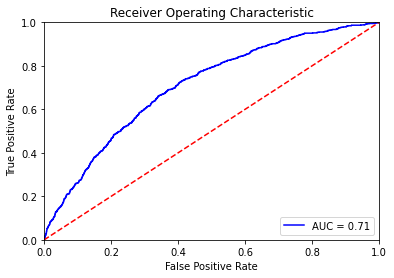

In [75]:
aucroclr = auc_roc_plot(y_test_lr, y_preds_lr)

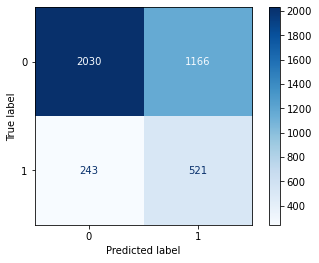

In [76]:
plot_confusion_matrix(clf_lr, X_test_lr, y_test_lr, values_format=".4g", cmap="Blues");

tn, fp, fn, tp = confusion_matrix(y_test_lr == 1, y_preds_lr > 0.5).ravel()

tn_lr = tn
fp_lr = fp
fn_lr = fn
tp_lr = tp

# KNN

In [77]:
df_knn = df.copy()



train_set_knn, test_set_knn = train_test_split(df_knn, test_size = 0.2, random_state = seed)

X_train_knn = train_set_knn.drop(['bad_loan'], axis = 1)
y_train_knn = train_set_knn['bad_loan']

X_test_knn = test_set_knn.drop(['bad_loan'], axis = 1)
y_test_knn = test_set_knn['bad_loan']



scaler_knn = MinMaxScaler()
features_names = X_train_knn.columns

X_train_knn = scaler_knn.fit_transform(X_train_knn)
X_train_knn = pd.DataFrame(X_train_knn, columns = features_names)

X_test_knn = scaler_knn.transform(X_test_knn)
X_test_knn = pd.DataFrame(X_test_knn, columns = features_names)

%time
max = 0
best_k = 0
for k in range(1, 200, 5):
    k = k + 1
    knn = KNeighborsClassifier(n_neighbors = k).fit(X_train_knn, y_train_knn)
    acc = knn.score(X_test_knn, y_test_knn)
    if(acc > max):
        max = acc
        best_k = k
    print('Accuracy for k = ', k , 'is : ' , acc)

Wall time: 0 ns
Accuracy for k =  2 is :  0.793939393939394
Accuracy for k =  7 is :  0.7934343434343434
Accuracy for k =  12 is :  0.805050505050505
Accuracy for k =  17 is :  0.807070707070707
Accuracy for k =  22 is :  0.8063131313131313
Accuracy for k =  27 is :  0.805050505050505
Accuracy for k =  32 is :  0.8058080808080809
Accuracy for k =  37 is :  0.806060606060606
Accuracy for k =  42 is :  0.8068181818181818
Accuracy for k =  47 is :  0.8053030303030303
Accuracy for k =  52 is :  0.8065656565656566
Accuracy for k =  57 is :  0.8058080808080809
Accuracy for k =  62 is :  0.8065656565656566
Accuracy for k =  67 is :  0.8068181818181818
Accuracy for k =  72 is :  0.807070707070707
Accuracy for k =  77 is :  0.8065656565656566
Accuracy for k =  82 is :  0.8068181818181818
Accuracy for k =  87 is :  0.807070707070707
Accuracy for k =  92 is :  0.8068181818181818
Accuracy for k =  97 is :  0.8073232323232323
Accuracy for k =  102 is :  0.807070707070707
Accuracy for k =  107 is : 

In [78]:
%time
knn = KNeighborsClassifier(n_neighbors = best_k, weights='uniform').fit(X_train_knn, y_train_knn)

y_preds_knn = knn.predict(X_test_knn)

Wall time: 0 ns


0.5006544502617801


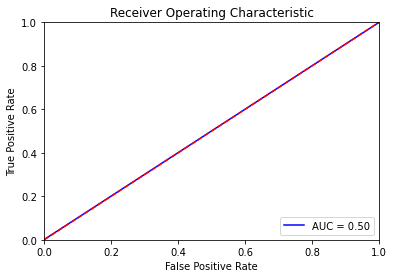

In [79]:
aucrocknn = auc_roc_plot(y_test_knn, y_preds_knn)

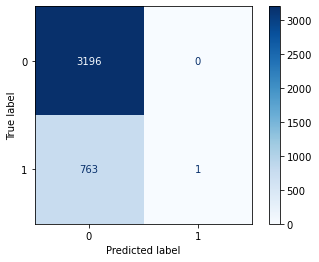

In [80]:
plot_confusion_matrix(knn, X_test_knn, y_test_knn, values_format=".4g", cmap="Blues");

tn, fp, fn, tp = confusion_matrix(y_test_knn == 1, y_preds_knn > 0.5).ravel()

tn_knn = tn
fp_knn = fp
fn_knn = fn
tp_knn = tp

# support vector machine

In [81]:
df_svm = df.copy()

train_set_svc, test_set_svc = train_test_split(df_svm, test_size = 0.2, random_state = seed)

X_train_svc = train_set_svc.drop(['bad_loan'], axis = 1)
y_train_svc = train_set_svc['bad_loan']
X_test_svc = test_set_svc.drop(['bad_loan'], axis = 1)
y_test_svc = test_set_svc['bad_loan']

scaler_svc = MinMaxScaler()
features_names = X_train_svc.columns

X_train_svc = scaler_svc.fit_transform(X_train_svc)
X_train_svc = pd.DataFrame(X_train_svc, columns = features_names)

X_test_svc = scaler_svc.transform(X_test_svc)
X_test_svc = pd.DataFrame(X_test_svc, columns = features_names)

%time
svc = SVC(random_state=seed, class_weight='balanced',probability=True, verbose=True)

parameters = {'C':[0.1, 1, 10]}
clf_svc = GridSearchCV(svc, parameters, cv = 5).fit(X_train_svc, y_train_svc)

Wall time: 0 ns
[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

In [82]:
clf_svc.best_estimator_

SVC(C=10, class_weight='balanced', probability=True, random_state=42,
    verbose=True)

In [83]:
y_preds_svc = clf_svc.predict_proba(X_test_svc)[:,1]

0.6885770989915404


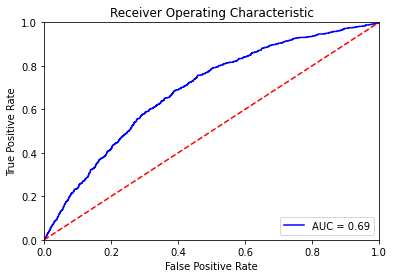

In [84]:
aucrocsvc = auc_roc_plot(y_test_svc, y_preds_svc)

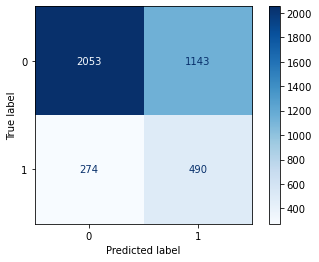

In [85]:
# Confusion Matrix display
plot_confusion_matrix(clf_svc, X_test_svc, y_test_svc, values_format=".4g", cmap="Blues");
                   
tn, fp, fn, tp = confusion_matrix(y_test_svc == 1, y_preds_svc > 0.5).ravel()

tn_svc = tn
fp_svc = fp
fn_svc = fn
tp_svc = tp

# DESICION TREE

In [86]:
df_trees = df.copy()

train_set_dt, test_set_dt = train_test_split(df_trees, test_size = 0.2, random_state = seed)

X_train_dt = train_set_dt.drop(['bad_loan'], axis = 1)
y_train_dt = train_set_dt['bad_loan']

X_test_dt = test_set_dt.drop(['bad_loan'], axis = 1)
y_test_dt = test_set_dt['bad_loan']

%time
clf_tree = tree.DecisionTreeClassifier(random_state = seed, max_depth = 10).fit(X_train_dt, y_train_dt)

important_features = pd.DataFrame(data = clf_tree.feature_importances_, index = X_train_dt.columns, columns = ["value"])
important_features.sort_values(by = "value", ascending = False)

Wall time: 0 ns


,value
dti,0.252338
grade,0.216716
annual_inc,0.200247
revol_util,0.150732
emp_length_num,0.050589
term_ 36 months,0.022149
home_ownership_mortgage,0.018653
purpose_1,0.015956
last_delinq_none,0.012631
term_ 60 months,0.010606


In [87]:
y_preds_dt = clf_tree.predict_proba(X_test_dt)[:,1]

0.6320687180965736


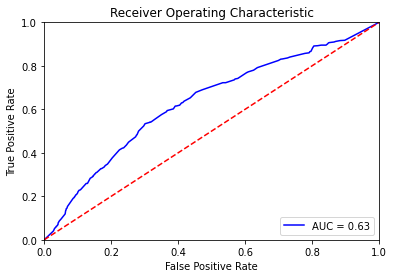

In [88]:
aucrocdt = auc_roc_plot(y_test_dt, y_preds_dt)

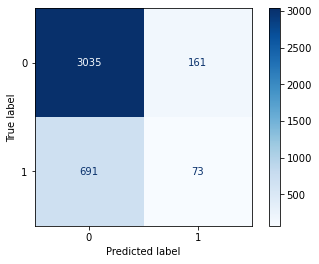

In [89]:
# Confusion Matrix display
plot_confusion_matrix(clf_tree, X_test_dt, y_test_dt, values_format=".4g", cmap="Blues");
                   
tn, fp, fn, tp = confusion_matrix(y_test_dt == 1, y_preds_dt > 0.5).ravel()

tn_dt = tn
fp_dt = fp
fn_dt = fn
tp_dt= tp

# Random Forest

In [90]:
df_rf = df.copy() 


train_set_rf, test_set_rf = train_test_split(df_rf, test_size = 0.2, random_state = seed)
X_train_rf = train_set_rf.drop(['bad_loan'], axis = 1)
y_train_rf = train_set_rf['bad_loan']
X_test_rf = test_set_rf.drop(['bad_loan'], axis = 1)
y_test_rf = test_set_rf['bad_loan']

%time
rf = RandomForestClassifier(random_state = seed, class_weight = None).fit(X_train_rf, y_train_rf)
parameters = {'n_estimators':[10, 100, 300, 1000]} # The number of trees in the forest.
clf_rf = GridSearchCV(rf, parameters, cv = 5).fit(X_train_rf, y_train_rf)

Wall time: 0 ns


In [91]:
clf_rf.best_estimator_

RandomForestClassifier(n_estimators=1000, random_state=42)

In [92]:
y_preds_rf = clf_rf.predict_proba(X_test_rf)[:,1]

0.6820268627669404


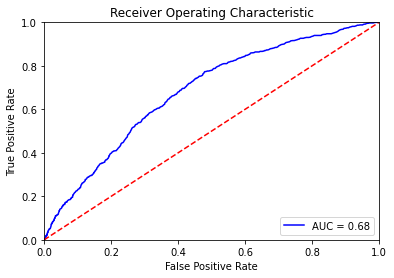

In [93]:
aucrocrf = auc_roc_plot(y_test_rf, y_preds_rf)

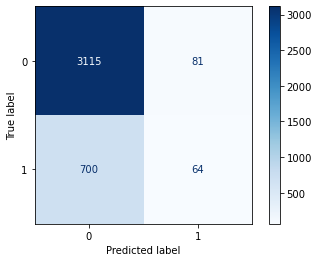

In [94]:

plot_confusion_matrix(clf_rf, X_test_rf, y_test_rf, values_format=".4g", cmap="Blues")

tn, fp, fn, tp = confusion_matrix(y_test_rf == 1, y_preds_rf > 0.5).ravel()

tn_rf = tn
fp_rf = fp
fn_rf = fn
tp_rf = tp

# Neural Neworks (NN)

In [95]:
df_nn = df.copy()

train_set_nn, test_set_nn = train_test_split(df_nn, test_size = 0.2, random_state = seed)

X_train_nn = train_set_nn.drop(['bad_loan'], axis = 1)
y_train_nn = train_set_nn['bad_loan']

X_test_nn = test_set_nn.drop(['bad_loan'], axis = 1)
y_test_nn = test_set_nn['bad_loan']

scaler_nn = MinMaxScaler()
features_names = X_train_nn.columns

X_train_nn = scaler_nn.fit_transform(X_train_nn)
X_train_nn = pd.DataFrame(X_train_nn, columns = features_names)

X_test_nn = scaler_nn.transform(X_test_nn)
X_test_nn = pd.DataFrame(X_test_nn, columns = features_names)

%time
mlp_nn = MLPClassifier(solver = 'adam', random_state = seed, max_iter = 1000 )
#‘adam’ refers to a stochastic gradient-based optimizer proposed by Kingma
parameters = {'hidden_layer_sizes': [(20,), (20,10), (20, 10, 2)],
              'learning_rate_init':[0.0001, 0.001, 0.01, 0.1]}

clf_nn = GridSearchCV(mlp_nn, parameters, cv = 5).fit(X_train_nn, y_train_nn)


Wall time: 0 ns


In [96]:
X_test_nn.head()

,grade,annual_inc,short_emp,emp_length_num,dti,last_delinq_none,revol_util,total_rec_late_fee,term_ 36 months,term_ 60 months,home_ownership_mortgage,home_ownership_own,home_ownership_rent,purpose_0,purpose_1,purpose_2,purpose_3
0,0.833333,0.508239,0.0,0.545455,0.193770,0.0,0.378211,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.333333,0.390644,0.0,0.363636,0.345241,0.0,0.758193,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.833333,0.379953,1.0,0.000000,0.924264,1.0,0.604074,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.500000,0.201779,0.0,0.727273,0.292083,0.0,0.449956,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.166667,0.294430,0.0,0.636364,0.689340,0.0,0.432241,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [97]:
clf_nn.best_estimator_

MLPClassifier(hidden_layer_sizes=(20, 10), learning_rate_init=0.0001,
              max_iter=1000, random_state=42)

In [98]:
y_preds_nn = clf_nn.predict_proba(X_test_nn)[:,1]

In [99]:
y_preds_nn

array([0.06204818, 0.28392225, 0.2133977 , ..., 0.19918842, 0.15291876,
       0.18652051])

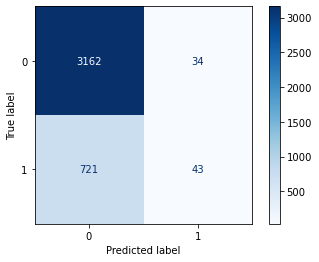

In [100]:

plot_confusion_matrix(clf_nn, X_test_nn, y_test_nn, values_format=".4g", cmap="Blues")

tn, fp, fn, tp = confusion_matrix(y_test_nn == 1, y_preds_nn > 0.5).ravel()

tn_nn = tn
fp_nn = fp
fn_nn = fn
tp_nn = tp

0.7055174498227496


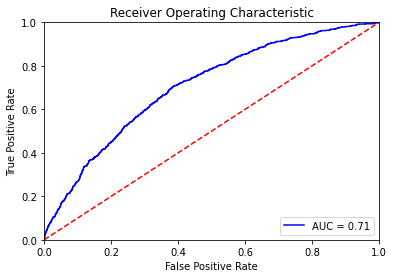

In [101]:
aucrocnn = auc_roc_plot(y_test_nn, y_preds_nn)

In [102]:
test_size = X_test_nn.shape[0]

# Result

In [103]:
# Creating performance table
results_1 = {'Classifier': ['AUC ROC (%)','TN (%)','FP (%)','FN (%)','TP (%)'],
             'Logistic Regression (LR)': [aucroclr*100, (tn_lr/test_size*100).round(2), (fp_lr/test_size*100).round(2), (fn_lr/test_size*100).round(2), (tp_lr/test_size*100).round(2)],
             'K Nearest Neighbour (KNN)': [aucrocknn*100, (tn_knn/test_size*100).round(2),(fp_knn/test_size*100).round(2), (fn_knn/test_size*100).round(2),(tp_nn/test_size*100).round(2)],
             'Support Vector Machine (SVC)': [aucrocsvc*100, (tn_svc/test_size*100).round(2),(fp_svc/test_size*100).round(2), (fn_svc/test_size*100).round(2),(tp_svc/test_size*100).round(2)],
             'Decision Trees (DT)': [aucrocdt*100, (tn_dt/test_size*100).round(2), (fp_dt/test_size*100).round(2), (fn_dt/test_size*100).round(2),(tp_dt/test_size*100).round(2)],
             'Random Forest (RF)': [aucrocrf*100, (tn_rf/test_size*100).round(2), (fp_rf/test_size*100).round(2), (fn_rf/test_size*100).round(2),(tp_rf/test_size*100).round(2)],
             'Neural Networks (NN)': [aucrocnn*100, (tn_nn/test_size*100).round(2), (fp_nn/test_size*100).round(2),(fn_nn/test_size*100).round(2),(tp_nn/test_size*100).round(2)]}

df1 = pd.DataFrame(results_1, columns = ['Classifier', 'Logistic Regression (LR)', 'K Nearest Neighbour (KNN)', 'Support Vector Machine (SVC)', 'Decision Trees (DT)', 'Random Forest (RF)', 'Neural Networks (NN)'])

df1.set_index("Classifier", inplace=True)

results = df1.T
results

Classifier,AUC ROC (%),TN (%),FP (%),FN (%),TP (%)
Logistic Regression (LR),70.670635,51.26,29.44,6.14,13.16
K Nearest Neighbour (KNN),50.065445,80.71,0.00,19.27,1.09
Support Vector Machine (SVC),68.857710,80.61,0.10,19.22,0.08
Decision Trees (DT),63.206872,76.64,4.07,17.45,1.84
Random Forest (RF),68.202686,78.66,2.05,17.68,1.62
Neural Networks (NN),70.551745,79.85,0.86,18.21,1.09


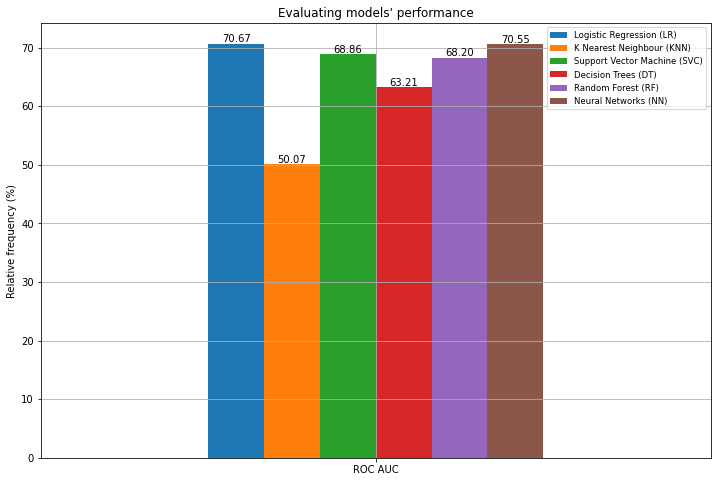

In [104]:

results_2 = {'Classifier': ['ROC AUC'], 'Logistic Regression (LR)': [aucroclr*100], 
             'K Nearest Neighbour (KNN)': [aucrocknn*100], 
             'Support Vector Machine (SVC)': [aucrocsvc*100], 
             'Decision Trees (DT)': [aucrocdt*100], 
             'Random Forest (RF)': [aucrocrf*100], 
             'Neural Networks (NN)': [aucrocnn*100]}
df2 = pd.DataFrame(results_2, columns = ['Classifier', 'Logistic Regression (LR)',
                                         'K Nearest Neighbour (KNN)', 'Support Vector Machine (SVC)',
                                         'Decision Trees (DT)', 'Random Forest (RF)', 'Neural Networks (NN)'])
df2.set_index("Classifier", inplace=True)
results_2 = df2


ax = results_2.plot(kind="bar", title=("Evaluating models' performance"), 
                    figsize=(12,8) ,fontsize=10, grid=True)
for p in ax.patches:
    ax.annotate("%2.2f" % p.get_height(), (p.get_x() + p.get_width() /
                                          2., p.get_height()), ha='center', va='center', xytext=(0, 5), 
                                          textcoords='offset points')

plt.legend(fontsize=8.5, loc="upper right")
plt.xlabel('')
plt.xticks(rotation='horizontal')
plt.ylabel('Relative frequency (%)')
plt.show()

# Example

In [228]:
df_test = df.copy()

train_set_test, test_set_test = train_test_split(df_test, test_size = 0.2, random_state = seed)

X_train_test = train_set_test.drop(['bad_loan'], axis = 1)
y_train_test = train_set_test['bad_loan']

In [229]:
x= {'grade': ['2.0'],
    'annual_inc': [100000.0],
    'short_emp': [0.0] ,
    'emp_length_num':[3.0] ,
    'dti': [60.00],
    'last_delinq_none': [1.0],
    'revol_util': [60.0],
    'total_rec_late_fee': [0.2],
    'term_ 36 months': [1.0],
    'term_ 60 months': [0.0],
    'home_ownership_mortgage':[0.0],
    'home_ownership_own':[0.0],
    'home_ownership_rent':[1.0],
    'purpose_0':[1.0],
    'purpose_1':[0.0],
    'purpose_2':[0.0],
    'purpose_3':[1.0]
     }

In [230]:
test= pd.DataFrame(x)

In [231]:
test.head()

,grade,annual_inc,short_emp,emp_length_num,dti,last_delinq_none,revol_util,total_rec_late_fee,term_ 36 months,term_ 60 months,home_ownership_mortgage,home_ownership_own,home_ownership_rent,purpose_0,purpose_1,purpose_2,purpose_3
0,2.0,100000.0,0.0,3.0,60.0,1.0,60.0,0.2,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0


In [232]:
scaler = MinMaxScaler()
features_names = X_train_test.columns

In [233]:
X_train_test = scaler.fit_transform(X_train_test)
X_train_test = pd.DataFrame(X_train_test, columns = features_names)

In [234]:
test_scaled = scaler.transform(test)
test_scaled = pd.DataFrame(test_scaled, columns = features_names)

In [235]:
test_scaled.head()

,grade,annual_inc,short_emp,emp_length_num,dti,last_delinq_none,revol_util,total_rec_late_fee,term_ 36 months,term_ 60 months,home_ownership_mortgage,home_ownership_own,home_ownership_rent,purpose_0,purpose_1,purpose_2,purpose_3
0,0.166667,0.650778,0.0,0.272727,1.714776,1.0,0.531444,0.013336,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0


In [236]:
test.head()

,grade,annual_inc,short_emp,emp_length_num,dti,last_delinq_none,revol_util,total_rec_late_fee,term_ 36 months,term_ 60 months,home_ownership_mortgage,home_ownership_own,home_ownership_rent,purpose_0,purpose_1,purpose_2,purpose_3
0,2.0,100000.0,0.0,3.0,60.0,1.0,60.0,0.2,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0


In [237]:
y_test_lr = clf_lr.predict_proba(test_scaled)[:,1]
y_test_knn = knn.predict_proba(test_scaled)[:,1]
y_test_svm = clf_svc.predict_proba(test_scaled)[:,1]
y_test_tree = clf_tree.predict_proba(test)[:,1]
y_test_rf = clf_rf.predict_proba(test)[:,1]
y_test_nn = clf_nn.predict_proba(test_scaled)[:,1]


In [238]:
y_test_lr > 0.5 # bad load = 1

array([ True])

In [239]:
y_test_knn > 0.5 # bad load = 1

array([False])

In [240]:
y_test_svm > 0.5 # bad load = 1

array([False])

In [241]:
y_test_tree > 0.5 # bad load = 1

array([ True])

In [242]:
y_test_rf > 0.5 # bad load = 1

array([False])

In [243]:
y_test_nn > 0.5 # bad load = 1

array([ True])

# Thank You